# Predicting heart disease using Machine Learning
We are going for the following approach:
* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * Typical angina: chest pain related decrease blood supply to the heart
   * Atypical angina: chest pain not related to heart.
   *  Non-anginal pain: typically esophageal spasms (non heart related).
   *  Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides.
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   *  Nothing to note
   *   ST-T Wave abnormality
    > can range from mild symptoms to severe problems
    > signals non-normal heart beat
    * Possible or definite left ventricular hypertrophy
      >Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * Upsloping: better heart rate with excercise (uncommon)
    *  Flatsloping: minimal change (typical healthy heart)
    *   Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns    Not working

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

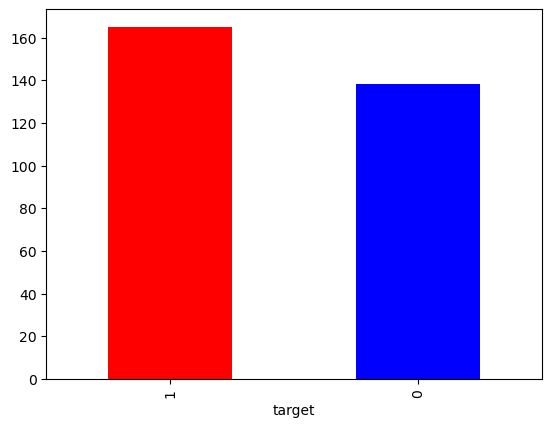

In [4]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#1--> Male
#2--> Female
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

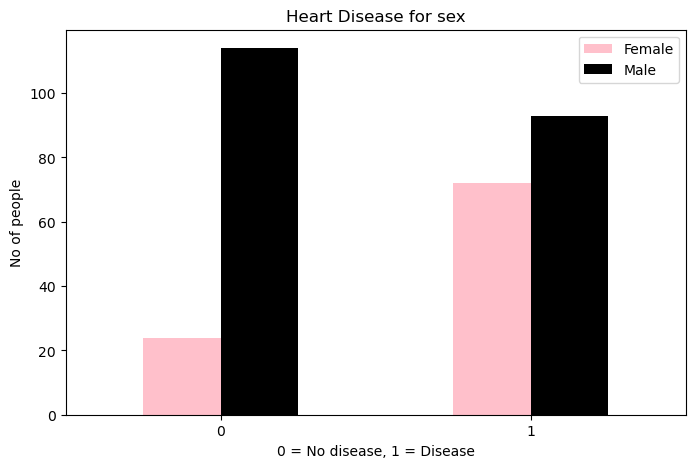

In [110]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["pink", "black"], figsize=(8, 5))
plt.title("Heart Disease for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("No of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [11]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate for heart disease

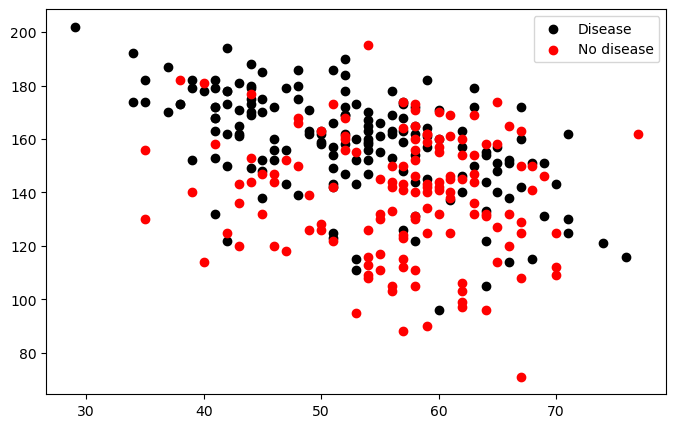

In [12]:
plt.figure(figsize=(8, 5))

# Scatter with positive example
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="black")

# Scatter with negative example
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="red")
plt.legend(["Disease", "No disease"])

<Axes: ylabel='Frequency'>

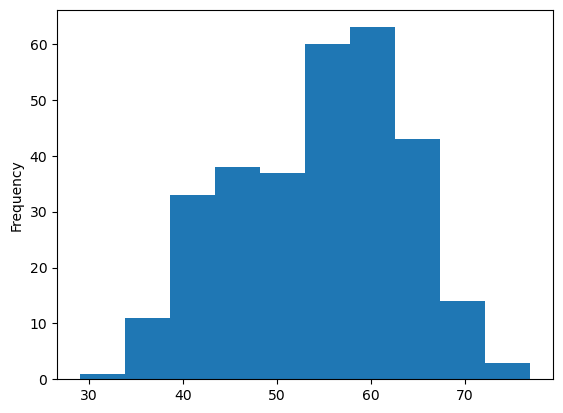

In [13]:
df.age.plot.hist()

### Heart disease frequency per chest pain type

<Axes: xlabel='cp'>

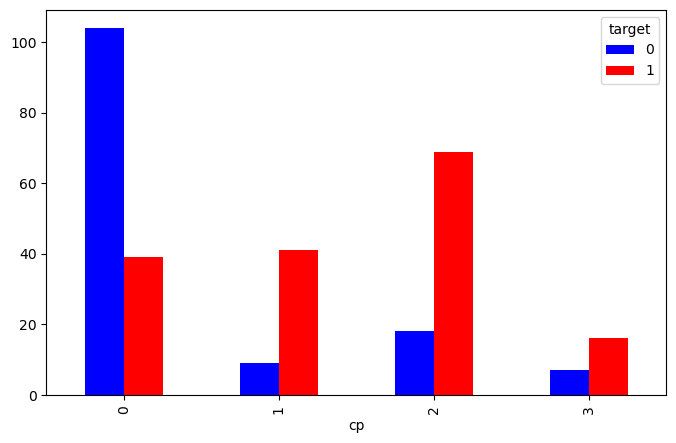

In [14]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["blue", "red"], figsize=(8, 5))

In [15]:
corr_matrix = df.corr()

In [16]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [17]:
# Seaborn is not working. So cant show on heatmap

### Modelling

In [18]:
# Split into X and Y
X = df.drop("target", axis=1)
y =df["target"]

In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [21]:
#  Put models in dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "KNeighbours": KNeighborsClassifier()}

# Create func to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate different machine learning models
    '''
    np.random.seed(42)
    # Make dictionary to keep model_score
    model_scores={}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\harsh\Desktop\ml_projects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8852459016393442,
 'KNeighbours': 0.6721311475409836}

### Model Comparison

<Axes: >

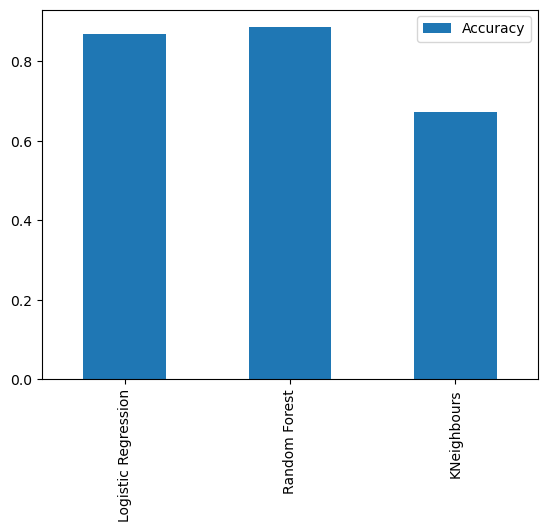

In [23]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [24]:
# Lets tune KNN

train_scores = []
test_scores = []

# Create list of different values for n_neighbours
neighbours = range(1, 21)

# Setup KNN
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)

    ## Fit the algorithm
    knn.fit(X_train, y_train)
    ## Update train_score list
    train_scores.append(knn.score(X_train, y_train))
    ## Update test score list
    test_scores.append(knn.score(X_test, y_test))

In [25]:
train_scores

[1.0,
 0.7975206611570248,
 0.768595041322314,
 0.743801652892562,
 0.7603305785123967,
 0.743801652892562,
 0.7768595041322314,
 0.7396694214876033,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.71900826446281,
 0.7148760330578512,
 0.6983471074380165,
 0.6983471074380165,
 0.6983471074380165,
 0.7107438016528925,
 0.6859504132231405,
 0.6859504132231405,
 0.6818181818181818]

In [26]:
test_scores

[0.5901639344262295,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836]

Maximum KNN scores on the test data is: 73.77%


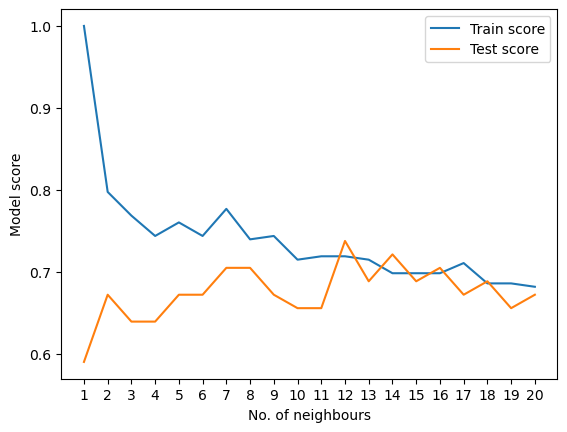

In [27]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xlabel("No. of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN scores on the test data is: {max(test_scores)*100:.2f}%")
plt.xticks(np.arange(1, 21, 1));

### Hyperparameter tuning by RandomisedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [54]:
# Create hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [34]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [55]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

In [57]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [61]:
log_reg_grid2 = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid2,
                          cv=5, 
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [62]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [63]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

### Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [68]:
y_pred = gs_log_reg.predict(X_test)

In [69]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [70]:
y_test

69     1
10     1
121    1
88     1
243    0
      ..
109    1
104    1
54     1
295    0
98     1
Name: target, Length: 61, dtype: int64

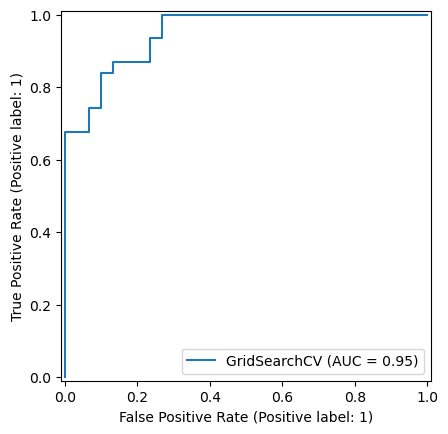

In [72]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [73]:
print(confusion_matrix(y_test, y_pred))

[[22  8]
 [ 0 31]]


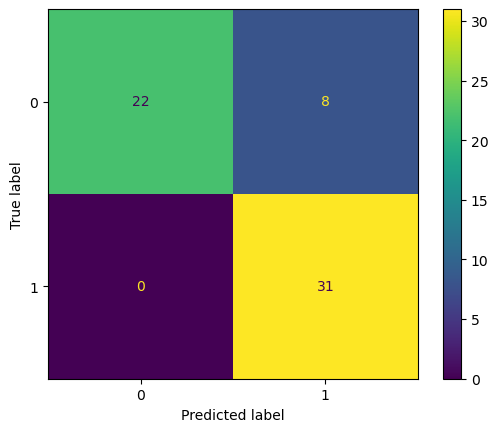

In [76]:
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test)

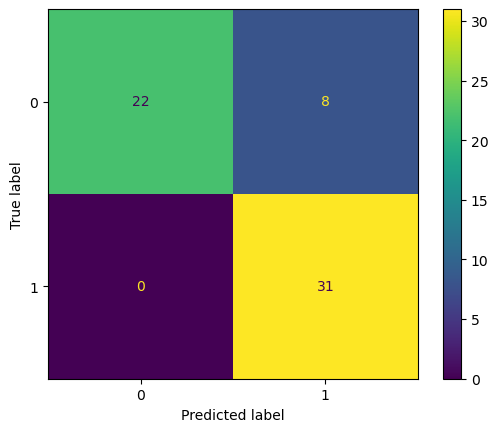

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        30
           1       0.79      1.00      0.89        31

    accuracy                           0.87        61
   macro avg       0.90      0.87      0.87        61
weighted avg       0.90      0.87      0.87        61



### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [79]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [80]:
#create new classifier with best params
clf = LogisticRegression(C=0.38566204211634725, solver="liblinear")

In [85]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy").mean()
cv_acc

0.8380874316939891

In [86]:
# Cross Validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision").mean()
cv_precision

0.8154667272314331

In [87]:
# Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall").mean()
cv_recall

0.9151515151515153

In [88]:
# Cross validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1").mean()
cv_f1

0.8614850462777628

<Axes: title={'center': 'Cross Validated classification matrix'}>

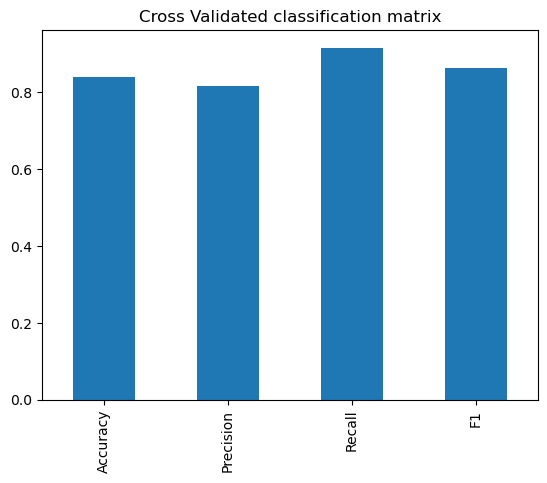

In [98]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
             "Precision": cv_precision,
             "Recall": cv_recall,
             "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(legend=False, title="Cross Validated classification matrix")

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [99]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [100]:
clf = LogisticRegression(C=0.38566204211634725, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [101]:
# check coef_
clf.coef_

array([[ 0.00780594, -0.99103456,  0.72110231, -0.00941173, -0.00364974,
         0.03091555,  0.32504466,  0.02629187, -0.53908377, -0.60695897,
         0.18725301, -0.6884732 , -0.53827133]])

In [103]:
# Match coef's of features to columns
features_dic = dict(zip(df.columns, list(clf.coef_[0])))
features_dic

{'age': 0.00780593624281592,
 'sex': -0.9910345607856164,
 'cp': 0.7211023149714425,
 'trestbps': -0.009411728626711285,
 'chol': -0.003649740985964996,
 'fbs': 0.0309155549344009,
 'restecg': 0.3250446587718078,
 'thalach': 0.026291868896909,
 'exang': -0.539083774036749,
 'oldpeak': -0.6069589694292628,
 'slope': 0.1872530099707832,
 'ca': -0.6884731992582741,
 'thal': -0.5382713323582867}

<Axes: title={'center': 'Feature importance'}>

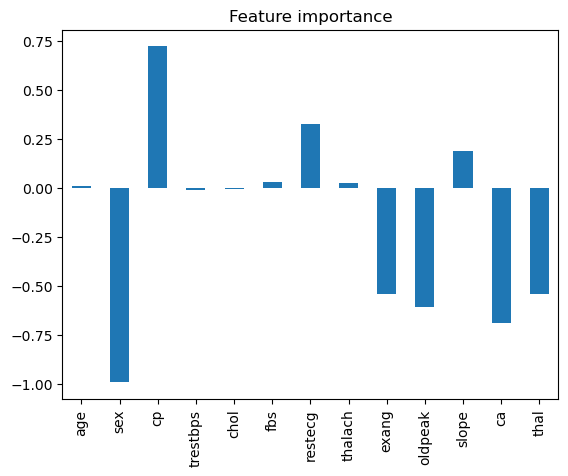

In [106]:
# Visualize feature importance
feature_df = pd.DataFrame(features_dic, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False)

In [107]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


### In the above tab and graph, there is a negative correlation between sex and target because sex bar is in negative axis.
### It means as the sex value increses, Target decreases
### Here when sex=0, target ratio is (72:24) i.e (3:1)
### When sex=1, target ratio is (93:114) which is almost (1:1)

In [108]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Here, slope and target has positive correlation, as the slope increses, the target ratio increases
### Target ratio can be target[0]/target[1] or target[1]/target[0]

## Note: So in a positive correlation, if the value increases, there is a higher chance that the model will predict a higher value of target i.e more values of 1 as target

slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?